In [145]:
import pandas as pd
df = pd.read_csv("Simulation.csv", header=None)
df = df.iloc[1: , :]

df.columns =['time','Entity', 'arrival', '0/1' ,'event']
df['time'] = df['time'].str.replace("At", "")
df['time'] = pd.to_numeric(df['time'])
df['arrival'] = pd.to_numeric(df['arrival'])
df['event'] = df['event'].str.replace(" ", "")
df.head

<bound method NDFrame.head of         time          Entity   arrival  0/1               event
1       2.67   Entity:     1     2.666  0.0  CreateEnd(Arrival)
2       2.67   Entity:     1     2.666  0.0          ServeBegin
3      13.11   Entity:     1     2.666  0.0            ServeEnd
4      42.79   Entity:     2    42.790  0.0  CreateEnd(Arrival)
5      42.79   Entity:     2    42.790  0.0          ServeBegin
..       ...             ...       ...  ...                 ...
420  1428.74   Entity:   134  1196.258  0.0            ServeEnd
421  1428.74   Entity:   135  1211.333  0.0          ServeBegin
422  1432.79   Entity:   153  1432.788  0.0  CreateEnd(Arrival)
423  1437.73   Entity:   135  1211.333  0.0            ServeEnd
424  1437.73   Entity:   136  1220.617  0.0          ServeBegin

[424 rows x 5 columns]>

In [146]:
# MBA643 Assignment 1 
# Akanksha Singh 200070 
# Priya Gole 200727 


# Q1. 
# Total number of unique entities = total number of arrivals = 153

# Q2. 
# A total of 135 entities have completed their service and left the system.

# Q3. 
# The server is serving entity 136 when the simulation is stopped.

In [147]:
# Question 4

j = 1

entity_time = []

for i in df['event']:
    if i == 'ServeEnd':
        entity_time.append(df['time'][j]-df['arrival'][j])
    j = j + 1

import statistics

print(statistics.mean(entity_time)) # Average entity time


116.21065925925926


In [148]:
# Question 5

j = 1

num = 0
time_last = 0

sum = 0

for i in df['event']:
    if i == 'CreateEnd(Arrival)':
        sum = sum + num*(df['time'][j]-time_last)
        time_last = df['time'][j]
        num = num + 1
    if i == 'ServeEnd':
        sum = sum + num*(df['time'][j]-time_last)
        time_last = df['time'][j]
        num = num - 1
    j = j + 1

average_entities = sum/(df['time'][j-1])

print(average_entities) # Average number of entities in system

12.161546326500801


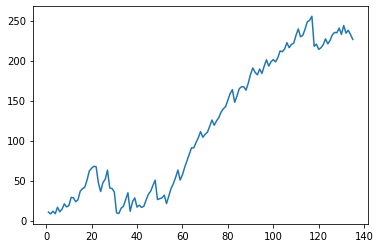

In [149]:
# Question 6

ent = list(range(1, len(entity_time)+1))
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.plot(ent, entity_time)

In [150]:
# Question 7

print(statistics.variance(entity_time))

7226.401820136761


In [151]:
# Question 8

# !pip install scipy

import numpy as np
import scipy.stats as st
  
intv = st.norm.interval(alpha=0.90,
                 loc=np.mean(entity_time),
                 scale=st.sem(entity_time))

print(intv)

(104.17634285092893, 128.2449756675896)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13804\1674695000.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intv = st.norm.interval(alpha=0.90,


In [152]:
import numpy as np
import scipy.stats as st
  
intv = st.norm.interval(alpha=0.95,
                 loc=np.mean(entity_time),
                 scale=st.sem(entity_time))

print(intv)

(101.8708868002338, 130.55043171828476)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13804\1087414630.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intv = st.norm.interval(alpha=0.95,


In [153]:
import numpy as np
import scipy.stats as st
  
intv = st.norm.interval(alpha=0.99,
                 loc=np.mean(entity_time),
                 scale=st.sem(entity_time))

print(intv)

(97.36500372806884, 135.0563147904497)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13804\1864496125.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intv = st.norm.interval(alpha=0.99,


In [154]:
# Question 9

j = 1

start_time = []
end_time = []

for i in df['event']:
    if i == 'ServeBegin':
        start_time.append(df['time'][j])
    if i == 'ServeEnd':
        end_time.append(df['time'][j])
    j = j + 1


start_time = start_time[:-1]

total_time = 0

for j in range(0, len(start_time)):
    total_time = total_time + (end_time[j] - start_time[j])

time_utilization = total_time/(df['time'][len(df['time'])-1])*100

print(time_utilization)

94.3918538251271


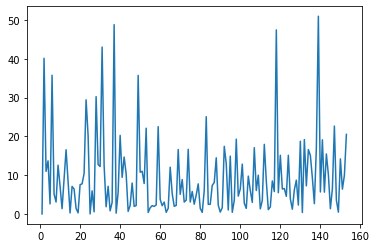

In [155]:
# Question 10

flag = 0
last_time = 0
j = 1

TBA = []

for i in df['event']:
    if i == 'CreateEnd(Arrival)' and flag == 0:
        flag = 1
        last_time = df['time'][j]
    if i == 'CreateEnd(Arrival)' and flag == 1:
        TBA.append( df['time'][j]-last_time)
        last_time = df['time'][j]
    j = j + 1

x = range(1, len(TBA)+1)

plt.plot(x, TBA)

(array([62., 42., 20., 15.,  5.,  2.,  0.,  3.,  1.,  3.]),
 array([ 0.   ,  5.095, 10.19 , 15.285, 20.38 , 25.475, 30.57 , 35.665,
        40.76 , 45.855, 50.95 ]),
 <BarContainer object of 10 artists>)

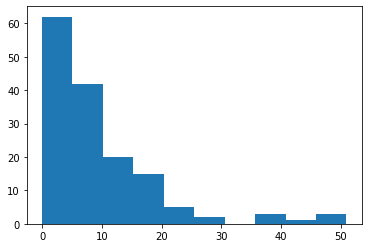

In [156]:
# Question 11

plt.hist(TBA)

In [157]:
# Question 12

j = 1

num = 0
time_last = 0

sum = 0

for i in df['event']:
    if i == 'CreateEnd(Arrival)':
        sum = sum + num*(df['time'][j]-time_last)
        time_last = df['time'][j]
        num = num + 1
       
    if i == 'ServeBegin':
        sum = sum + num*(df['time'][j]-time_last)
        time_last = df['time'][j]
        num = num - 1
    j = j + 1

average_queue_length = sum/(df['time'][j-1])
print(average_queue_length)

11.217627788249533


In [158]:
# Question 13

j = 1

arrival_time = []
begin_time = []

for i in df['event']:
    if i == 'CreateEnd(Arrival)':
        arrival_time.append(df['time'][j])
    if i == 'ServeBegin':
        begin_time.append(df['time'][j])
    j = j + 1


sum = 0
for j in range(0, len(begin_time)):
    sum = sum + begin_time[j] - arrival_time[j]

average_waiting = sum/(len(begin_time))
print(average_waiting) 

106.9741911764706


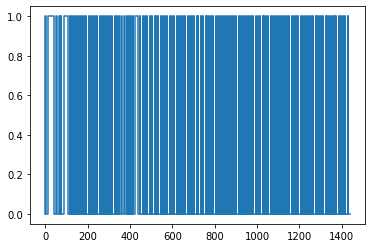

In [159]:
# Question 14

time_x = []
binary_y = []

time_x.append(0)
binary_y.append(0)
for i in range(0, len(start_time)):
    time_x.append(start_time[i])
    binary_y.append(1)
    time_x.append(end_time[i])
    binary_y.append(0)

plt.step(time_x, binary_y)